




#  KAGGLE CASE






Víctor Benito Segura 1597165

## 1- DATA CLEANING

#### INSTALLING LIBRARIES

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
import pandas as pd
import seaborn as sns

#### LOADING THE DATASET

In [206]:
dataset = pd.read_csv('cardio_train.csv',delimiter=';')
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### NULL VALUES

In [207]:
print("Tant per cent of null values:")

print((dataset.isnull().sum()/dataset.shape[0])*100)

Tant per cent of null values:
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


We can see that our dataset has not null values.

### **Which is the datatype of each attribute?**
| Nom | Descripció | Tipus |
|:-:|:--|:-:|
id| ID number.|int
gender| 1-women 2-men.|categorical
height| height in cm of a pacient.|int
weight | weight in kg of a pacient. | int
ap_hi|Systolic blood pressure.| int
ap_lo| Diastolic blood pressure.| int
cholesterol| 1-normal, 2-above normal, 3-well-above-normal.| categorical
gluc| glucosa: 1-normal, 2-above normal, 3-well-above-normal.| categorical
smoke| 1-smoke, 0-doesn't smoke.| dummy
alco| 1-drinks alcohol, 1-doesn't drink alcohol.| dummy
active| 1-is active, 0-is not active.| dummy
cardio| 1-cardiovascular disease, 0-not cardiovascular disease.| dummy

Number of rows of our dataset:

In [208]:
print(dataset.shape[0])

70000


We delete repeated rows:

In [209]:
dataset=dataset.drop_duplicates(keep = 'first')
print(dataset.shape[0])

70000


In this case we don't have repeated rows so we continue.

#### ATRIBUTTE TRANSFORMATIONS

We transform the **gender** atributte into a dummy: 0-Women, 1-Men.

In [210]:
if (any(dataset['gender']==2)):
    dataset['genderBool'] = dataset['gender']==2

We transform the categorical attribute **cholesterol** using One-Hot-Encoding.

In [211]:
dataset["normal_cholesterol"] = dataset['cholesterol']==1
dataset["above_cholesterol"] = dataset['cholesterol']==2
dataset["well_above_cholesterol"] = dataset['cholesterol']==3

We act by the same way with the attribute **glucosa**.

In [212]:
dataset["normal_gluc"] = dataset['gluc']==1
dataset["above_gluc"] = dataset['gluc']==2
dataset["well_above_gluc"] = dataset['gluc']==3

We add the attribute **IBM ('Body Mass Index')** using our attributes weight and height because it may has a strong correlation with the objective attribute **cardio**.

In [213]:
dataset['BMI']=np.round(dataset['weight']/((dataset['height']/100)**2),2)

This is how our dataset looks like:

In [214]:
dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,genderBool,normal_cholesterol,above_cholesterol,well_above_cholesterol,normal_gluc,above_gluc,well_above_gluc,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,...,1,0,True,True,False,False,True,False,False,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,...,1,1,False,False,False,True,True,False,False,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,...,0,1,False,False,False,True,True,False,False,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,...,1,1,True,True,False,False,True,False,False,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,...,0,0,False,True,False,False,True,False,False,23.01


In [215]:
colX =  [i for i in dataset.columns if i not in ['id','gender','cholesterol','gluc','cardio']] 
colXY= [i for i in dataset.columns if i not in ['id','gender','cholesterol','gluc']] 
print('Columns that we will use: ',colX)
X = np.array(dataset)
y = np.array(dataset['cardio'])

Columns that we will use:  ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'genderBool', 'normal_cholesterol', 'above_cholesterol', 'well_above_cholesterol', 'normal_gluc', 'above_gluc', 'well_above_gluc', 'BMI']


#### CORRELATION MATRIX

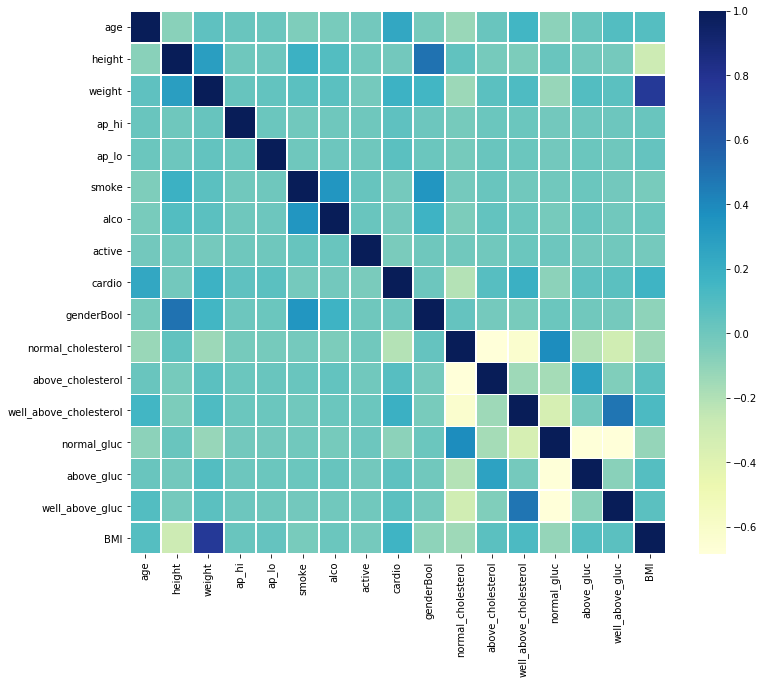

In [216]:
correlation = dataset[colXY].corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(correlation, annot=False, linewidths=.7,cmap="YlGnBu")

Only strong (positive and negative) correlations:

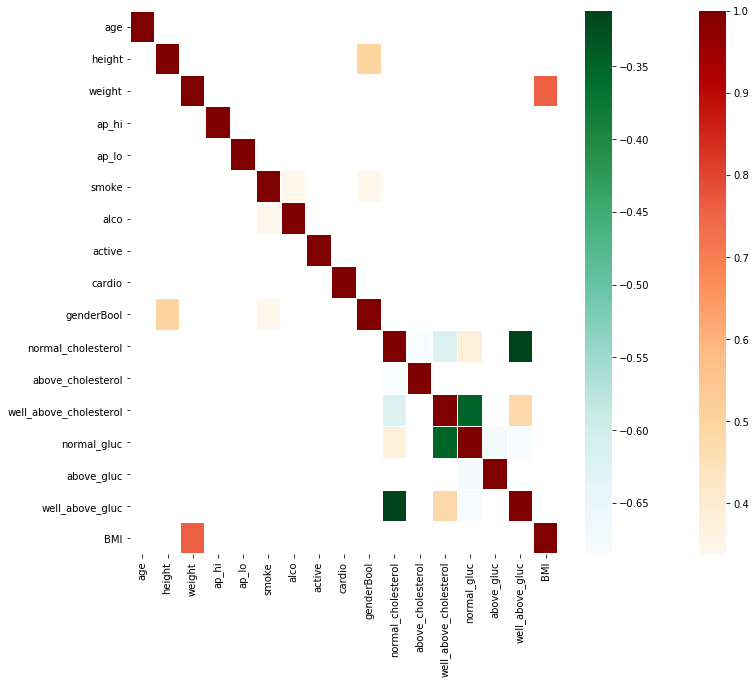

In [217]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(correlation[correlation>0.3], annot=False, linewidths=.7,cmap='OrRd')
ax = sns.heatmap(correlation[correlation<-0.3], annot=False, linewidths=.7,cmap="BuGn")


In [218]:
print(len(colX))

16


#### DISTRIBUTION OF THE ATRIBUTTES

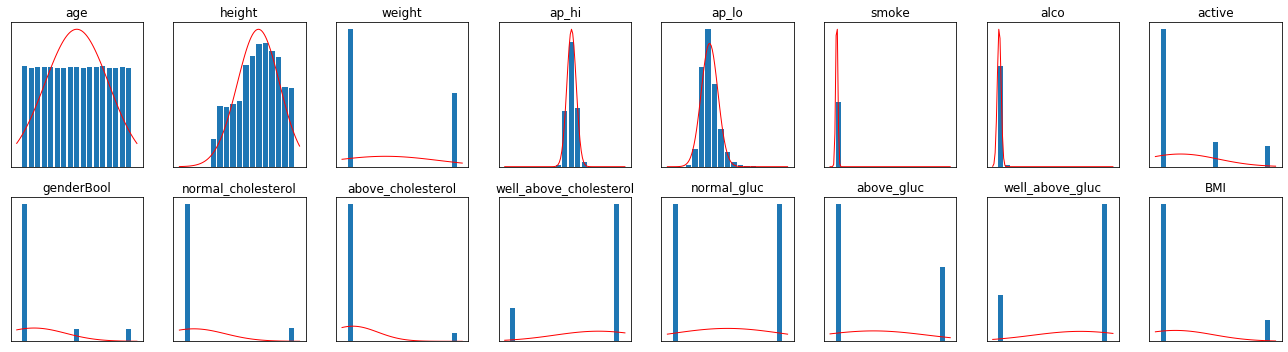

In [219]:
from scipy.stats import norm
fig = plt.figure(figsize=(18, 5))

for i in range(16):
    xi = X[:,i]
    xi = xi.astype(float)
    plt.subplot(2,8, i+1)
    plt.hist(xi, bins=17, range=[np.nanmin(xi), np.nanmax(xi)],density=True, histtype="bar", rwidth=0.8, label="hola")
    plt.title(colX[i])

    xi = xi[~np.isnan(xi)]
    mu, std = norm.fit(xi) 
    xmin, xmax = plt.xlim()
    xh = np.linspace(xmin, xmax, 100)
    p = norm.pdf(xh, mu, std)
    plt.plot(xh, p, 'k', linewidth=1,color='r')
        
    g = plt.gca()
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### OUTLIERS

We will try to find outliers in our numeric attributes: 'age', 'weight', 'height', 'ap_hi','ap_lo','IBM'

In [220]:
contX =  [i for i in dataset.columns if i in ['age','height','weight','ap_hi','ap_lo','BMI']] 

Let's see our attribute characteristics:

Numerical attributes stats:

In [221]:
dataset[contX].describe()

,age,height,weight,ap_hi,ap_lo,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414,27.556545
std,2467.251667,8.210126,14.395757,154.011419,188.472530,6.091405
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000,3.470000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000,23.880000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000,26.375000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000,30.220000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000,298.670000


**Height**: We observe that height goes from 0.55 meters to 2.50 meters, although according to historical values this extrem results could be real, they are very strange values which don't represent our society so we will delete them.

**Weight**: Acting by the same way as height we will eliminate this extreme values.

**ap_hi**: systolic blood pressure has to be positive.

**ap_lo**: diastolic blood pressure has to be positive.

#### NUMERICAL ATTRIBUTES BOXPLOT

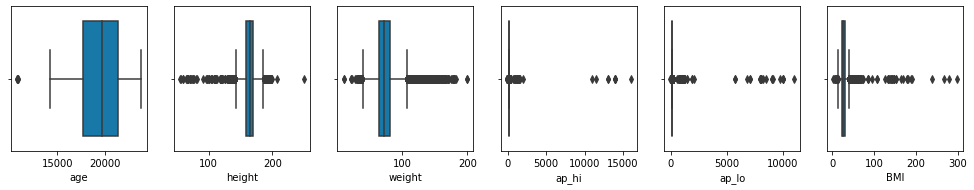

In [222]:
fig = plt.figure(figsize=(20,25))

for i in range(len(contX)):
    plt.subplot(8,7,i+2)
    sns.boxplot(x=contX[i], data=dataset, palette='winter')

In [223]:
dC= dataset
dC.shape[0]

70000

**REMOVING OUTLIERS FROM HEIGHT**

In this case, the attribute extreme values seem to be outliers 0,55m and 2.50m are the extremes as we said before. 
We will delete the outliers with the Tukey method.

In [224]:
def detect_outliers(dC, drop = False):
    for col in dC.columns:
        Q1 = np.percentile(dC[col], 25) # 25th percentile of the data of the given feature
        Q3 = np.percentile(dC[col], 75) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = dC[col][~((dC[col] >= Q1 - outlier_step) & (dC[col] <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(col, len(outliers)))
        
detect_outliers(dC[['age','height','weight','ap_hi','ap_lo','BMI']])

For the feature age, No of Outliers is 4
For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature ap_hi, No of Outliers is 1435
For the feature ap_lo, No of Outliers is 4632
For the feature BMI, No of Outliers is 2000


We observe that if we use Tukey method we have got so many outliers so we are going to trait them one by one.

We will transform height and weight with a log function in order to reduce extreme values. There is no problem because all the values are >0.

In [225]:
dC[['height','weight']]=np.log(dC[['height','weight']])
detect_outliers(dC[['height','weight']])

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


We have already reduced some datasets without loosing information but we would like to reduce even more the outliers so we continue.

We define 0.005 and 0.995 Quantile range to handle the remaining outliers

In [226]:
dC = dC[(dC['weight'] > dC['weight'].quantile(0.005)) & (dC['weight'] < dC['weight'].quantile(0.995))]
dC = dC[(dC['height'] > dC['height'].quantile(0.005)) & (dC['height'] < dC['height'].quantile(0.995))]
detect_outliers(dC[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


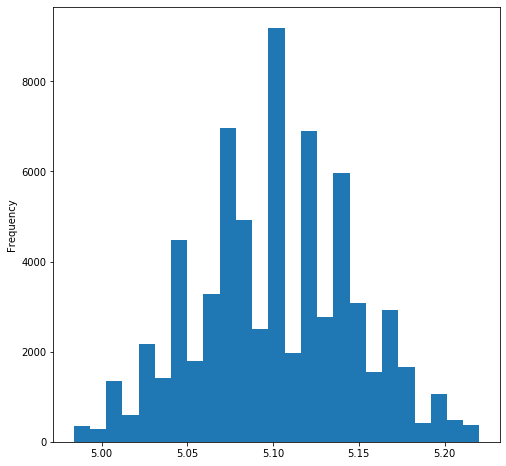

In [227]:
fig = plt.figure(figsize=(8,8))

# Plot the distribution of the heights without the outliers
dC['height'].plot(kind='hist',bins=25)

**REMOVE OUTLIERS FROM ap_hi and ap_lo**

ap_hi: systolic blood pressure has to be positive.
ap_lo: diastolic blood pressure has to be positive.

In [228]:
dC = dC[(dC['ap_hi'] > 0 )]
dC = dC[(dC['ap_lo'] > 0) ]
detect_outliers(dC[['ap_hi', 'ap_lo']])

For the feature ap_hi, No of Outliers is 1353
For the feature ap_lo, No of Outliers is 4416


If we observe the values for ap_hi and ap_lo we observe that values above 150 and 120 respectively are cases of hypertension crisis. As well as we have got values over 16020.000000 and 11000.000000 repsectively that are clearly errors. We will delete all the values over 300 for ap_hi and 275 for ap_lo.  

In [229]:
dC = dC[(dC['ap_hi'] < 275)] 
dC = dC[(dC['ap_lo'] < 250)]

detect_outliers(dC[['ap_hi', 'ap_lo']])

For the feature ap_hi, No of Outliers is 1188
For the feature ap_lo, No of Outliers is 3494


In [230]:
dC.shape[0]

67394

**REMOVE OUTLIERS FROM BMI**

In [231]:
detect_outliers(dC[['BMI']])

For the feature BMI, No of Outliers is 1584


As we did before with weight and height we will tranform the attribute with a log function to try to reduce outliers.

In [232]:
dC[['BMI']]=np.log(dC[['BMI']])

In [233]:
detect_outliers(dC[['BMI']])

For the feature BMI, No of Outliers is 648


In [234]:
dC = dC[(dC['BMI'] > dC['BMI'].quantile(0.005)) & (dC['BMI'] < dC['BMI'].quantile(0.995))]
detect_outliers(dC[['BMI']])

For the feature BMI, No of Outliers is 280


In [235]:
dC.shape[0]

66709

Finally, let's manage the age outliers:

In [236]:
detect_outliers(dC[['age']])

For the feature age, No of Outliers is 4


The attribute age it's in days, we are going to pass it to years for a better comprehension.

In [237]:
dC['age'] = dC['age'].div(365).apply(lambda x: int(x))

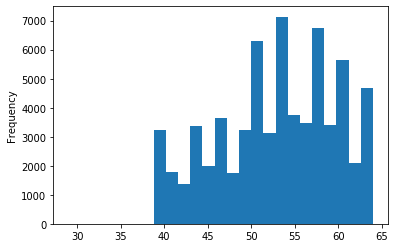

In [238]:
dC['age'].plot(kind='hist',bins=25)

In [239]:
dC.describe()['age']

count    66709.000000
mean        52.840052
std          6.759694
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

Apparently we don't see possible outliers: minimum value it is 29 and maximum 64 so we just ignore this 4 values.

In [240]:
dC.shape[0]

66709

We have removed less than 5% of the rows and now we don't have outliers.

In [244]:
(1-(dC.shape[0]/dataset.shape[0]))*100

4.7014285714285675

#### TRANSFORM OUR DATASET INTO DATA

In [246]:
print(dC.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'genderBool', 'normal_cholesterol', 'above_cholesterol',
       'well_above_cholesterol', 'normal_gluc', 'above_gluc',
       'well_above_gluc', 'BMI'],
      dtype='object')


In [253]:
colX =  [i for i in dC.columns if i not in ['id','gender','cholesterol','gluc','cardio']] 
print('Columns that we will use: ',colX)
X = np.array(dC[colX])
y = np.array(dC['cardio'])
X.shape[1]

Columns that we will use:  ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'genderBool', 'normal_cholesterol', 'above_cholesterol', 'well_above_cholesterol', 'normal_gluc', 'above_gluc', 'well_above_gluc', 'BMI']


16

## DATA NORMALIZATION

It is always a good praxis normalize our data, specially if in the future we would like to use different models as super vector machines which is our case.


In [254]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

mm = make_pipeline(preprocessing.StandardScaler(), preprocessing.Normalizer())

X_scaled = mm.fit_transform(X)

#### DISTRIBUTION OF THE NORMALIZED ATTRIBUTES

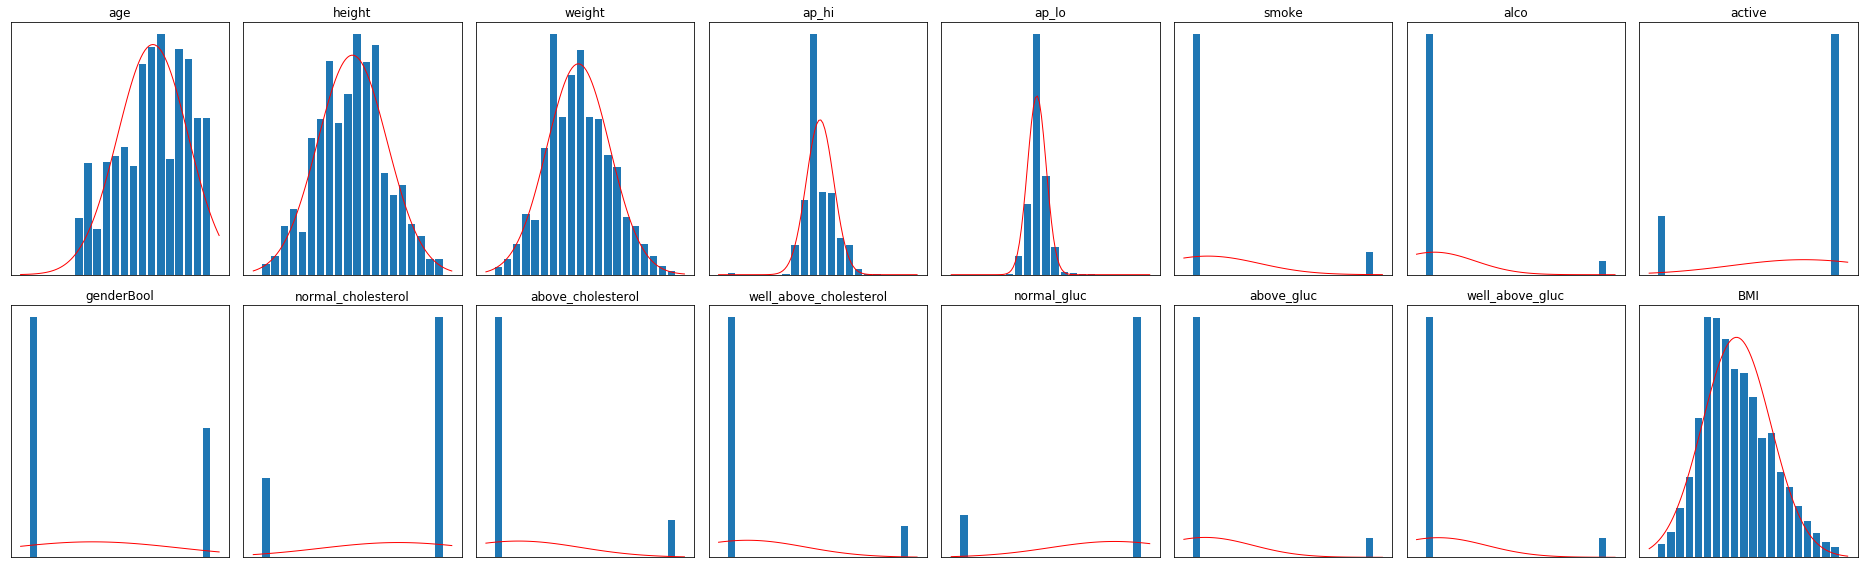

In [262]:
from scipy.stats import norm
fig = plt.figure(figsize=(26, 8))

for i in range(16):
    xi = X[:,i]
    xi = xi.astype(float)
    plt.subplot(2,8, i+1)
    plt.hist(xi, bins=20, range=[np.nanmin(xi), np.nanmax(xi)],density=True, histtype="bar", rwidth=0.8, label="hola")
    plt.title(colX[i])

    xi = xi[~np.isnan(xi)]
    mu, std = norm.fit(xi) 
    xmin, xmax = plt.xlim()
    xh = np.linspace(xmin, xmax, 100)
    p = norm.pdf(xh, mu, std)
    plt.plot(xh, p, 'k', linewidth=1,color='r')
        
    g = plt.gca()
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### FEATURE SELECTION

The objective now is to reduce the number of attributes of our dataset and conserve just that ones who are related with the target value 'cardio'

#### PCA COMPONENT

11
11


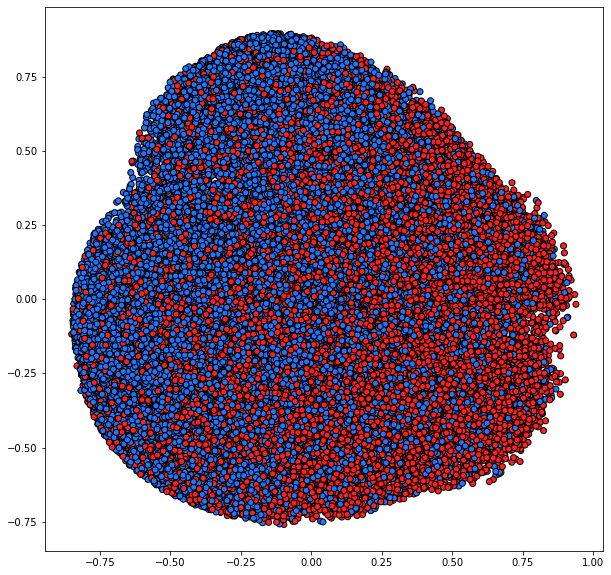

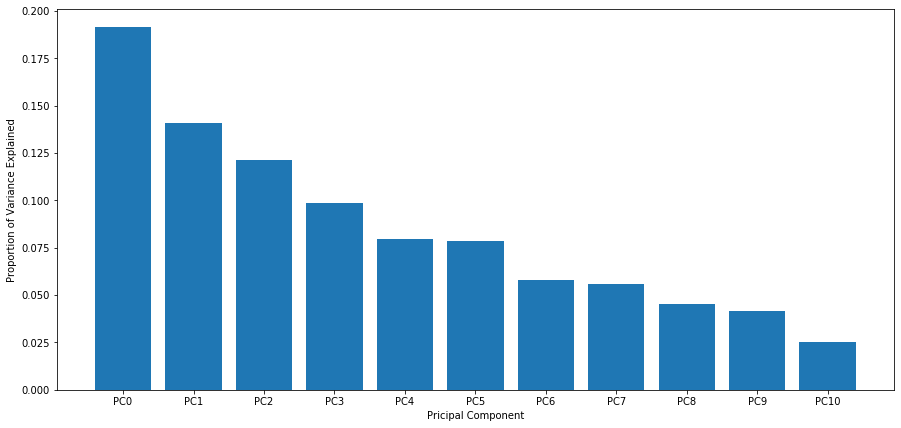

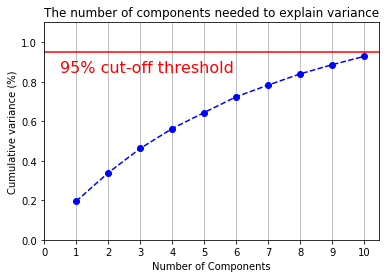

In [264]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95).fit(X_scaled)
pc = pca.transform(X_scaled)
nc = int(pca.n_components_)
print(nc)

pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in dC['cardio']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
var = pca.explained_variance_[0:nc]  # percentage of variance explained
labels = ['PC'+str(i) for i in range(nc)]

print(pca.n_components_)
plt.figure(figsize=(15,7))
plt.bar(labels,var)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')



fig, ax = plt.subplots()
xx = np.arange(1, nc, step=1)
yy = np.cumsum(pca.explained_variance_ratio_[:(nc-1)])

plt.ylim(0.0,1.1)
plt.plot(xx, yy, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, nc, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# TROBAR I EXPLICAR BENEFICIS O INCONVENIENTS !!!

The benefits of performing a PCA, as shown in the scatter plot of classes, is to reduce the initial data set to a two-dimensional data set that retains the essential information.

In this case our PCA determines that we only need 11 attributes of the initials 16 to perform a 95% variance of the dataset.

#### FEATURE SELECTION WITH LASSO

In [267]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_scaled, y)

# print the selected features
print(model.coef_)

[ 0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.]


In [269]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# apply the transformation to the scaled dataset
X_poly = poly.fit_transform(X_scaled)

# print the transformed dataset
print(X_poly.shape)

(66709, 152)


The number of columns increase a lot, from 16 to 152 so we reject this option.

### CLASSIFICATION MODELS

First of all we observe that our dataset is balanced which is a very good aspect that makes our work so much easy.

In [245]:
dC[dC['cardio']==1].shape[0] / dC.shape[0]*100

49.494071264746886

Preparing the dataset to modelling

We are going to use 80% of our data to train and 20% to test.

In [270]:
from sklearn.model_selection import train_test_split

# split the data using a split ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# print the size of the train and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53367, 16) (53367,)
(13342, 16) (13342,)


### MODELS

1. **LogisticRegression**: Logistic regression is a linear model that estimates the probability of a binary outcome, based on a linear combination of the input features. Logistic regression is widely used for binary classification tasks, such as predicting the likelihood of a customer churning or defaulting on a loan.
2. **Support Vector Machines**: Support vector machines (SVMs) are a class of supervised learning algorithms that learn a hyperplane that maximally separates the classes in the training data. SVMs are widely used for binary and multi-class classification tasks, especially when the data is not linearly separable.
3. **K-Nearest Neighbors**: K-nearest neighbors (KNN) is a non-parametric algorithm that classifies a sample by identifying its k nearest neighbors in the training set, and then predicting the class that occurs most frequently among them. KNN is simple to implement and efficient to run, and can handle large and high-dimensional datasets.
4. **Naive Bayes**: Naive Bayes is a probabilistic classifier that uses Bayes' theorem to predict the class of a sample, based on the probabilities of the features given the classes. Naive Bayes is simple and fast to train, and can handle high-dimensional and sparse data.
5. **Random Forest**: A random forest is an ensemble learning method that trains multiple decision trees on random subsets of the data, and then combines their predictions using majority voting. Random forests are widely used for classification tasks, due to their high accuracy and ability to handle large and complex datasets.
6. **Decision Trees**: Decision trees are a non-parametric learning method that recursively splits the data into subsets based on a decision rule, until the data is sufficiently pure to predict the target variable. Decision trees are easy to interpret and visualize, and can handle both numerical and categorical data.
7. **Gradient Boosting**: Gradient boosting is an ensemble learning method that trains a sequence of weak learners, such as decision trees, on the residual errors of the previous learners. Gradient boosting is highly effective for classification tasks, and is often used for winning solutions in machine learning competitions.
8. **